In [4]:
import numpy as np
from astropy.io import fits
from dla_cnn.desi.DesiMock import DesiMock
from os.path import join
from matplotlib import pyplot as plt
import sympy

In [5]:
file_num = [705,706,711,718,723,731,735,743,747,748,761,773,777,785,789,791]
path = r"F:\Astronamy\desi-0.2-100\desi-0.2-100\desi-0.2-100\spectra-16\7"
file_path = join(path,str(file_num[0]))
spectra = join(file_path,"spectra-16-%s.fits"%file_num[0])
truth = join(file_path,"truth-16-%s.fits"%file_num[0])
zbest = join(file_path,"zbest-16-%s.fits"%file_num[0])#generate file path

In [6]:
specs = DesiMock()
specs.read_fits_file(spectra,truth,zbest)#use DesiMock.read_fits_file(spectra, truth, zbest) to load all data from the fits file

In [7]:
keys = list(specs.data.keys())#get spectra id

In [8]:
sightline = specs.get_sightline(keys[0])#use DesiMock.get_sightline(id) to grab the specific spectra

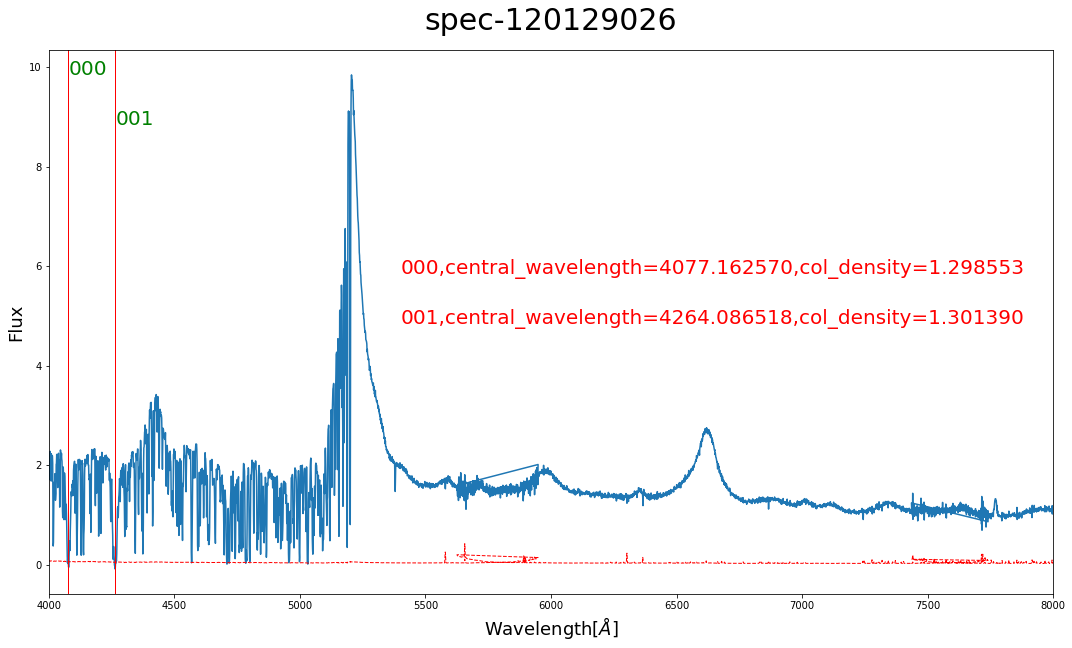

In [9]:
max_flux = max(sightline.flux)
plt.figure(figsize=(18,10))
plt.title('spec-%s'%(str(sightline.id)),fontdict=None,loc='center',pad='20',fontsize=30,color='black')
plt.xlabel('Wavelength'+'['+'$\AA$'+']',fontsize=18)
plt.ylabel('Flux',fontsize=18)
plt.xlim([4000,8000])
wavelength = np.exp(np.log(10)*sightline.loglam)
plt.plot(wavelength,sightline.flux)
plt.plot(wavelength,sightline.error,color='red',ls='--',linewidth=1)
for i in range(len(sightline.dlas)):
    plt.axvline(x=sightline.dlas[i].central_wavelength,ls="-",c="red",linewidth=1)
    plt.text(sightline.dlas[i].central_wavelength,max_flux-i,'%s'%(sightline.dlas[i].id),fontsize=20,color='green')
    plt.text(5400,max_flux-4-i,'%s,central_wavelength=%f,col_density=%f'%(sightline.dlas[i].id,sightline.dlas[i].central_wavelength,sightline.dlas[i].col_density),fontsize=20,color='red')
plt.show()